In [2]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from scipy.cluster.vq import whiten, kmeans2


In [3]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': 'c52b7825851b4357af3e06c1888152f0' }).json()
        return json[result_key]
    except:
        print(json)
        return None
    
teams = call_api('http://api.football-data.org/v1/soccerseasons/439/teams', 'teams')
teams

[{'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/496/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/496/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/496'}},
  'code': None,
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/6/63/Rio_Ave_FC.svg',
  'name': 'FC Rio Ave',
  'shortName': 'Rio Ave',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/503/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/503/players'},
   'self': {'href': 'http://api.football-data.org/v1/teams/503'}},
  'code': 'FCP',
  'crestUrl': 'http://upload.wikimedia.org/wikipedia/de/e/ed/FC_Porto_1922-2005.svg',
  'name': 'FC Porto',
  'shortName': 'Porto',
  'squadMarketValue': None},
 {'_links': {'fixtures': {'href': 'http://api.football-data.org/v1/teams/583/fixtures'},
   'players': {'href': 'http://api.football-data.org/v1/teams/583/players'},
   'self': {'href

In [8]:
for team in teams:
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    wins = 0
    losses = 0
    goals_scored = 0
    goals_missed = 0
    
    for f in fixtures:
        
        if f['status']!='FINISHED':
            continue
        if team['name'] == f['homeTeamName']:
            goals1 = f['result']['goalsHomeTeam'] if f['result']['goalsHomeTeam'] else 0
            goals2 = f['result']['goalsAwayTeam'] if f['result']['goalsAwayTeam'] else 0
        elif team['name'] == f['awayTeamName']:
            goals1 = f['result']['goalsAwayTeam'] if f['result']['goalsAwayTeam'] else 0
            goals2 = f['result']['goalsHomeTeam'] if f['result']['goalsHomeTeam'] else 0
        goals_scored += goals1
        goals_missed += goals2
        
        if goals1 > goals2:
            wins += 1
        elif goals2 > goals1:
            losses += 1
            
    print('Team "{}", {} wins, {} losses, {} goals_scored, {} goals_missed'.format(team['name'], wins, losses, goals_scored, goals_missed))
    team['wins'] = wins
    team['losses'] = losses
    team['goals_scored'] = goals_scored
    team['goals_missed'] = goals_missed

Team "FC Rio Ave", 2 wins, 0 losses, 3 goals_scored, 1 goals_missed
Team "FC Porto", 2 wins, 0 losses, 5 goals_scored, 0 goals_missed
Team "Moreirense FC", 0 wins, 0 losses, 1 goals_scored, 1 goals_missed
Team "FC Paços de Ferreira", 0 wins, 1 losses, 2 goals_scored, 3 goals_missed
Team "Sporting CP", 2 wins, 0 losses, 3 goals_scored, 0 goals_missed
Team "Maritimo Funchal", 1 wins, 1 losses, 1 goals_scored, 1 goals_missed
Team "CD Tondela", 0 wins, 1 losses, 1 goals_scored, 2 goals_missed
Team "SL Benfica", 2 wins, 0 losses, 4 goals_scored, 1 goals_missed
Team "Boavista Porto FC", 0 wins, 2 losses, 2 goals_scored, 4 goals_missed
Team "FC Arouca", 9 wins, 20 losses, 33 goals_scored, 57 goals_missed
Team "Vitoria Setubal", 0 wins, 1 losses, 1 goals_scored, 2 goals_missed
Team "C.F. Os Belenenses", 1 wins, 1 losses, 1 goals_scored, 1 goals_missed
Team "Vitoria Guimaraes", 1 wins, 1 losses, 3 goals_scored, 5 goals_missed
Team "Sporting Braga", 1 wins, 1 losses, 3 goals_scored, 4 goals_miss

In [9]:
team_for_pd = []
for team in teams:
    team_for_pd.append({'name': team['name'], 'goals_scored': team['goals_scored'], 'goals_missed': team['goals_missed']})
team_for_pd

[{'goals_missed': 1, 'goals_scored': 3, 'name': 'FC Rio Ave'},
 {'goals_missed': 0, 'goals_scored': 5, 'name': 'FC Porto'},
 {'goals_missed': 1, 'goals_scored': 1, 'name': 'Moreirense FC'},
 {'goals_missed': 3, 'goals_scored': 2, 'name': 'FC Paços de Ferreira'},
 {'goals_missed': 0, 'goals_scored': 3, 'name': 'Sporting CP'},
 {'goals_missed': 1, 'goals_scored': 1, 'name': 'Maritimo Funchal'},
 {'goals_missed': 2, 'goals_scored': 1, 'name': 'CD Tondela'},
 {'goals_missed': 1, 'goals_scored': 4, 'name': 'SL Benfica'},
 {'goals_missed': 4, 'goals_scored': 2, 'name': 'Boavista Porto FC'},
 {'goals_missed': 57, 'goals_scored': 33, 'name': 'FC Arouca'},
 {'goals_missed': 2, 'goals_scored': 1, 'name': 'Vitoria Setubal'},
 {'goals_missed': 1, 'goals_scored': 1, 'name': 'C.F. Os Belenenses'},
 {'goals_missed': 5, 'goals_scored': 3, 'name': 'Vitoria Guimaraes'},
 {'goals_missed': 4, 'goals_scored': 3, 'name': 'Sporting Braga'},
 {'goals_missed': 4, 'goals_scored': 3, 'name': 'GD Estoril Praia'},

In [10]:
teams_pd = pd.DataFrame(team_for_pd)
teams_pd

,goals_missed,goals_scored,name
0,1,3,FC Rio Ave
1,0,5,FC Porto
2,1,1,Moreirense FC
3,3,2,FC Paços de Ferreira
4,0,3,Sporting CP
5,1,1,Maritimo Funchal
6,2,1,CD Tondela
7,1,4,SL Benfica
8,4,2,Boavista Porto FC
9,57,33,FC Arouca


In [11]:
del teams_pd['name']
teams_pd

,goals_missed,goals_scored
0,1,3
1,0,5
2,1,1
3,3,2
4,0,3
5,1,1
6,2,1
7,1,4
8,4,2
9,57,33


In [12]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[ 0.05725143,  0.36485654],
       [ 0.        ,  0.60809423],
       [ 0.05725143,  0.12161885],
       [ 0.1717543 ,  0.24323769],
       [ 0.        ,  0.36485654],
       [ 0.05725143,  0.12161885],
       [ 0.11450287,  0.12161885],
       [ 0.05725143,  0.48647538],
       [ 0.22900573,  0.24323769],
       [ 3.26333171,  4.0134219 ],
       [ 0.11450287,  0.12161885],
       [ 0.05725143,  0.12161885],
       [ 0.28625717,  0.36485654],
       [ 0.22900573,  0.36485654],
       [ 0.22900573,  0.36485654],
       [ 0.05725143,  0.12161885],
       [ 3.32058314,  2.6756146 ],
       [ 0.22900573,  0.24323769]])

In [13]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

/Users/fanis/anaconda/lib/python3.6/site-packages/scipy/cluster/vq.py:660: UserWarning: One of the clusters is empty. Re-run kmean with a different initialization.
  warnings.warn("One of the clusters is empty. "


(array([[ 3.29195742,  3.34451825],
        [-0.90574813, -0.18531225],
        [ 0.1216593 ,  0.2736424 ]]),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2], dtype=int32))

In [16]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'r',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'r',
 'b']

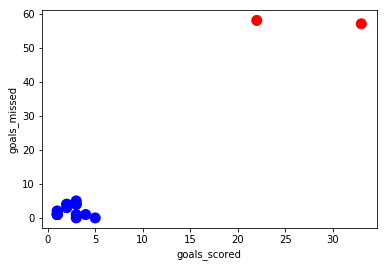

In [17]:
teams_pd.plot.scatter(x='goals_scored', y='goals_missed', c=colors, s=100)

In [18]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

/Users/fanis/anaconda/lib/python3.6/site-packages/scipy/cluster/vq.py:660: UserWarning: One of the clusters is empty. Re-run kmean with a different initialization.
  warnings.warn("One of the clusters is empty. "


(array([[ 0.08996654,  0.13899297],
        [ 3.29195742,  3.34451825],
        [-2.58531654, -2.57465394],
        [ 0.14630922,  0.37836974],
        [ 1.35612477,  1.57371595]]),
 array([3, 3, 0, 0, 3, 0, 0, 3, 3, 1, 0, 0, 3, 3, 3, 0, 1, 3], dtype=int32))

In [19]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['y',
 'y',
 'r',
 'r',
 'y',
 'r',
 'r',
 'y',
 'y',
 'g',
 'r',
 'r',
 'y',
 'y',
 'y',
 'r',
 'g',
 'y']

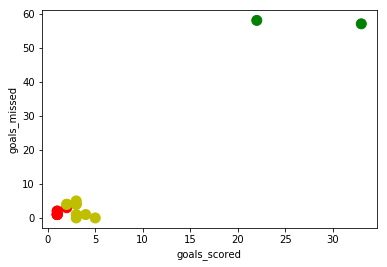

In [20]:
teams_pd.plot.scatter(x='goals_scored', y='goals_missed', c=colors, s=100)